Importing **libraries** 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

Loading the data

In [2]:
df = pd.read_csv("churn.csv")

**Exploratory Data Analysis**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

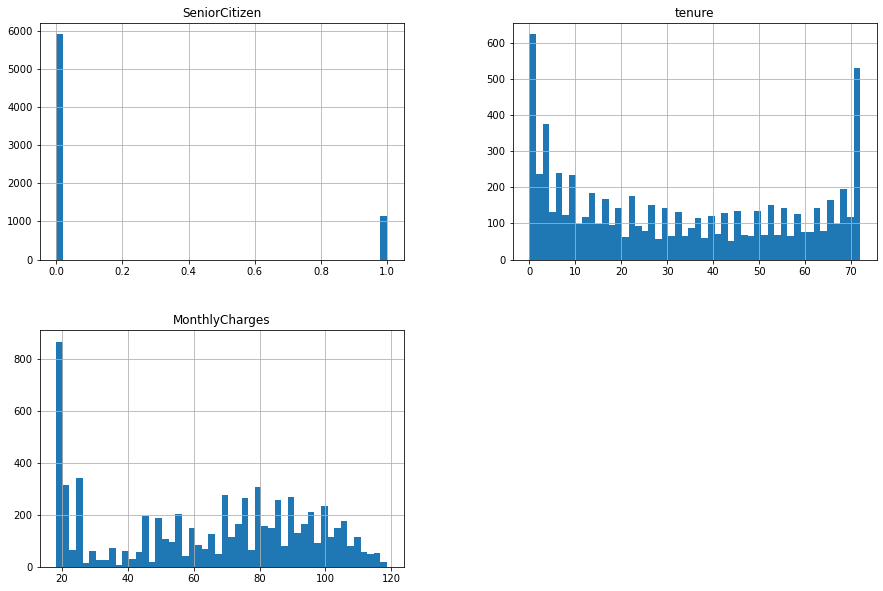

In [7]:
df.hist(bins=50, figsize=(15,10))

In [8]:
##Calculation of the standard correlation coefficient
corr_matrix = df.corr()

<AxesSubplot:>

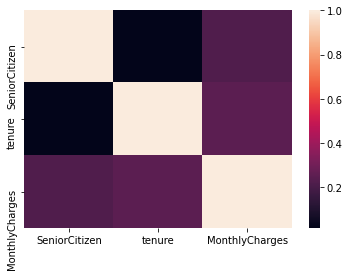

In [9]:
sns.heatmap(corr_matrix)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

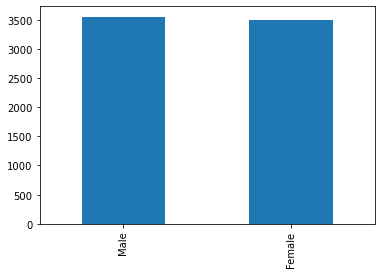

In [14]:
df["gender"].value_counts().plot.bar()

<AxesSubplot:xlabel='gender', ylabel='count'>

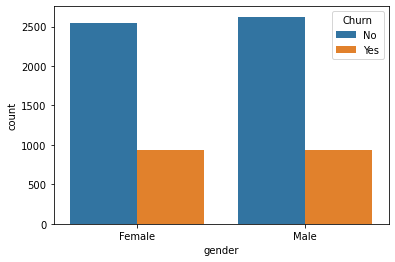

In [18]:
sns.countplot(x="gender", hue="Churn", data=df)

No conclusion can be made here like women are churning more than men or vice-versa.

<AxesSubplot:xlabel='Partner', ylabel='count'>

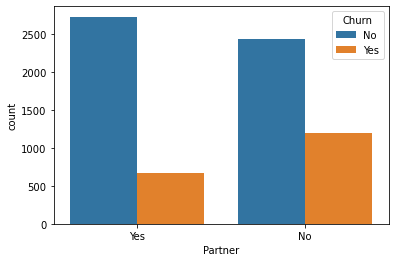

In [20]:
sns.countplot(x="Partner", hue="Churn", data=df)

A customer with a partner is less likely to unsubscribe than a single customer.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

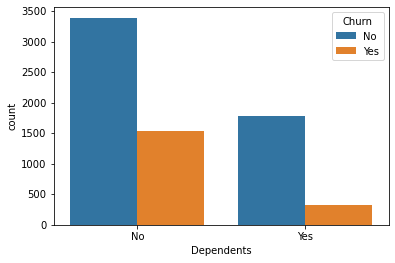

In [21]:
sns.countplot(x="Dependents", hue="Churn", data=df)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

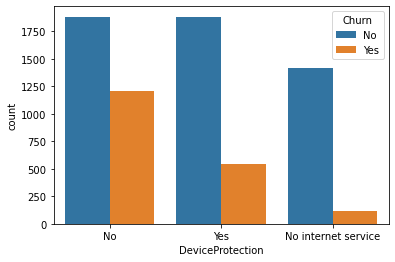

In [22]:
sns.countplot(x="DeviceProtection", hue="Churn", data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

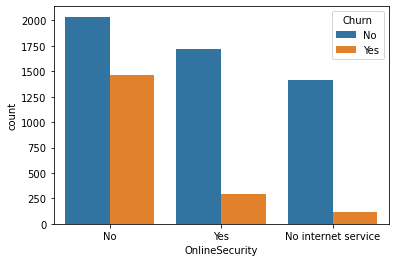

In [23]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

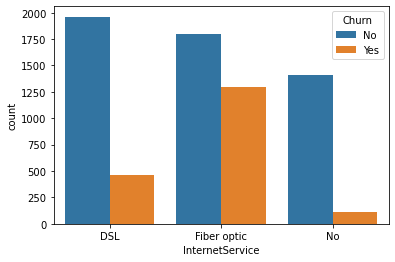

In [24]:
sns.countplot(x="InternetService", hue="Churn", data=df)

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Converting the feature **TotalCharges** from `str` to `float`

In [38]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [48]:
df["TotalCharges"].iloc[1]

'1889.5'

In [51]:
df["TotalCharges"].shape[0]

7043

In [54]:
index_list = []
for i in range(df["TotalCharges"].shape[0]):
    print(df["TotalCharges"].iloc[i])
    if df["TotalCharges"].iloc[i] == " ":
        index_list.append(i)

29.85
1889.5
108.15
1840.75
151.65
820.5
1949.4
301.9
3046.05
3487.95
587.45
326.8
5681.1
5036.3
2686.05
7895.15
1022.95
7382.25
528.35
1862.9
39.65
202.25
20.15
3505.1
2970.3
1530.6
4749.15
30.2
6369.45
1093.1
6766.95
181.65
1874.45
20.2
45.25
7251.7
316.9
3548.3
3549.25
1105.4
475.7
4872.35
418.25
4861.45
981.45
3906.7
97
144.15
4217.8
4254.1
3838.75
1426.4
1752.65
633.3
4456.35
1752.55
6311.2
7076.35
894.3
7853.7
4707.1
5450.7
2962
957.1
857.25
244.1
3650.35
2497.2
930.9
887.35
49.05
1090.65
7099
1424.6
177.4
6139.5
2688.85
482.25
2111.3
1216.6
79.35
565.35
496.9
4327.5
973.35
918.75
2215.45
1057
927.1
1009.25
2570.2
74.7
5714.25
7107
7459.05
927.35
4748.7
113.85
1107.2
2514.5
20.2
19.45
3605.6
3027.25
7611.85
100.2
7303.05
927.65
3921.3
1363.25
5238.9
3042.25
3954.1
2868.15
3423.5
248.4
1126.35
1064.65
835.15
2151.6
5515.45
112.75
229.55
350.35
62.9
3027.65
2135.5
1723.95
19.75
3985.35
1215.65
1502.65
3260.1
35.45
81.25
1188.2
1778.5
1277.75
1170.55
70.45
6425.65
563.65
5971.25
528

6822.15
71.55
157.55
5029.2
581.7
7318.2
420.45
7576.7
633.4
321.65
4965
6151.9
1253.9
25.15
45.2
5893.15
5420.65
2627.35
5037.55
743.75
6589.6
92.45
6733.15
3410
199.85
593.3
7288.4
5229.8
4464.8
5068.05
401.85
4451.85
6688.95
2661.1
73.05
1211.65
7030.65
1020.2
5597.65
6223.3
1024.65
2933.2
1258.3
82.9
7789.6
2067
3452.55
5468.95
1802.15
733.55
3021.45
3687.85
1391.15
274.35
1214.05
5510.65
1322.85
1973.75
2196.3
7843.55
3211.9
130.15
692.35
85.5
6849.4
203.95
2117.2
6565.85
424.75
3306.85
168.9
253.8
197.4
3838.2
2065.15
5064.45
1140.05
2447.45
1263.9
45.95
1838.15
44.75
1185
1743.9
70.15
85.55
8529.5
6549.45
7806.5
25.7
6287.3
3251.85
50.6
7904.25
729.95
2654.05
2416.55
3520.75
5969.95
226.8
1082.75
565.75
4370.75
90.05
2169.4
550.6
55.45
6300.85
160.05
436.6
1781.35
3467
5552.5
2835.5
3591.25
88.35
63.75
617.15
870.25
601.25
111.65
6046.1
3923.8
777.3
512.45
141.45
892.15
1682.05
3398.9
4984.85
1445.3
305.55
507.9
3640.45
2673.45
389.8
2401.05
651.55
156.1
2796.35
70.05
407.05
646

4220.35
1558.7
2743.45
4055.5
2710.25
6055.55
810.7
2538.2
6129.2
1750.85
36.55
6652.45
2575.45
6019.35
1379.6
1284.2
296.15
653.25
412.6
85.5
49.55
1928.7
71.25
7845.8
1750.7
216.2
178.5
115.1
6029
2745.2
3721.9
3121.1
990.45
1004.35
157.65
3219.75
572.85
4554.85
1847.55
1766.75
1462.05
25.25
2193.2
2433.5
641.15
2398.4
861.85
583
7332.4
249.55
4475.9
416.45
788.6
202.3
6994.6
4116.15
2263.45
1374.35
4915.15
838.5
75.1
3715.65
4273.45
45.8
20.5
2044.75
30.55
1398.25
20.1
328.95
4680.05
69.1
3778.2
3161.4
2188.45
999.45
1888.65
3990.6
71.15
1240.25
2635
235
2347.85
7156.2
3089.6
270.8
2901.8
4949.1
2198.9
374.5
761.95
1520.9
190.25
5163
4059.85
2281.6
1356.7
231.45
50.75
242.4
4264.25
2774.55
3605.2
4069.9
874.2
1145.35
1323.7
5497.05
534.7
2455.05
38.7
947.4
357
1476.25
70.8
1448.6
291.9
5903.15
1201.65
5921.35
146.65
1759.4
844.45
7774.05
134.05
140.95
249.95
1701.65
592.65
135.75
7732.65
4282.4
219.65
2018.1
669
68.95
224.85
3771.5
196.75
943.85
6572.85
3175.85
29.15
20.05
318.9
24.

5430.65
849.9
151.75
299.4
1086.75
2692.75
1389.6
3767.4
3641.5
2535.55
35.75
6880.85
3753.2
637.55
181.6
5329.55
44.55
1539.8
2209.75
223.75
7751.7
1174.35
4385.05
2606.35
1539.45
18.9
1261.35
58.15
225.6
5969.3
253.9
400
340.85
2515.3
227.35
305.95
365.4
2357.75
198.5
554.25
90.85
69.4
742.95
251.65
5597.65
20.15
4816.7
768.05
1215.8
3522.65
1834.95
305.1
910.45
155.65
3656.25
52
150.85
389.25
1873.7
1261
108.7
7346.2
3708.4
469.65
44.1
1385.85
548.8
712.75
6405
1637.4
2536.55
6042.7
958.25
1730.65
459.6
201.95
285.2
6145.85
1529.45
4664.5
1740.7
552.95
3496.3
93.7
7053.35
301.55
312.7
1046.5
2960.1
834.2
6953.4
4134.85
899.8
541.5
116.85
7942.15
5321.25
4156.8
223.6
768.45
3765.05
2157.5
108.05
1391.65
1379.8
1273.3
810.45
1810.85
7782.85
70.3
1797.1
377.85
445.3
851.75
7624.2
355.1
575.45
906.85
1057.55
19.4
1388.75
1641.3
1375.15
152.7
185.2
195.05
1826.7
417.5
344.5
1660
2180.55
2835.9
45.15
2730.85
5437.1
20.2
6981.35
5794.45
747.2
1267.95
3674.95
1275.6
5893.9
724.65
1536.75
36

4504.55
3579.15
49.7
276.5
8175.9
890.35
259.8
5588.8
50.6
58
5568.35
2203.65
938.95
2024.1
3623.95
2369.05
3877.95
4577.9
25.85
2871.5
672.55
1573.7
1270.55
7711.45
126.05
2193.65
64.55
31.2
38.25
3348.1
533.6
2907.55
1620.8
3480.35
293.85
3243.45
4137.2
79.25
44.9
19.4
5348.65
659.65
3180.5
118.5
3023.85
3365.85
195.3
1031.1
997.65
6471.85
6241.35
6501.35
2317.1
2237.55
5231.3
5275.8
165.5
358.5
6614.9
80.5
2421.75
1294.6
1299.1
5733.4
305.55
7430.75
900.5
630.6
3856.75
1222.65
374.8
1625
7234.8
331.85
3959.35
5088.4
3969.4
4860.85
788.05
1266.35
470.95
688.2
387.7
845.25
560.6
4230.25
4983.05
4113.15
25.7
521
471.85
5976.9
506.9
4299.75
7548.6
1654.75
80.35
4551.5
6227.5
20.05
76.4
514
57.5
1474.35
880.2
3270.25
69.95
3919.15
7285.7
93.3
169.05
7658.3
5959.3
5295.7
4693.2
3512.9
5231.2
3603.45
217.45
6875.35
19.25
2021.35
2564.95
5611.75
7610.1
35.05
73
45.75
4543.95
450.4
1297.35
4442.75
1423.15
4378.35
74.2
2716.3
70.1
450.65
1175.85
558.8
2220.1
3283.05
142.35
4939.25
4237.5
335.

In [55]:
index_list

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [59]:
len(index_list)

11

**Transforming all empty string into Nan**

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [4]:
df["TotalCharges"].isna().sum()

11

In [5]:
df.shape

(7043, 21)

In [7]:
## Dropping all rows with NaN values
df.dropna(inplace=True)

In [8]:
df.shape

(7032, 21)

In [9]:
## Converting the feature from str into float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df["TotalCharges"].dtype

dtype('float64')

**Dividing the data into features data and target data**

In [11]:
df["customerID"]

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [12]:
df_real = df.drop(["customerID"], axis=1)
df_real 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
df_real["TotalCharges"].dtype

dtype('float64')

In [14]:
df_features = df_real.drop(["Churn"], axis=1)
df_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [15]:
df_target = df_real["Churn"]
df_target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [16]:
df_target = df_target.map({"Yes":1, "No":0})
df_target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

**Splitting data into training and testing data**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=5)

In [19]:
cat_names = []
num_names = []

for col in X_train.columns:
    if df_real[col].dtype == "O":
        cat_names.append(col)
    else:
        num_names.append(col)

In [20]:
cat_names

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [21]:
num_names

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

**Using Pipeline to prepare the data**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [23]:
class AttributesSelection(BaseEstimator, TransformerMixin):
    def __init__(self, num_attributes_selected):
        self.num_attributes_selected = num_attributes_selected
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_selected = X[self.num_attributes_selected]
        return X_selected

In [24]:
num_pipeline = Pipeline([
    ("select_num", AttributesSelection(num_names)),
    ("scaler", StandardScaler()),
    
])

In [25]:
cat_pipeline = Pipeline([
    ("select_cat", AttributesSelection(cat_names)),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [26]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [27]:
X_train_transformed = full_pipeline.fit_transform(X_train)

In [28]:
lg_clf = LogisticRegression()

**Tuning the hyperparameters with `GridSearch()`**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = {"C":10.**np.arange(-4,4), "penalty": ["l1", "l2"]}

In [31]:
clf_grid = GridSearchCV(estimator = lg_clf, param_grid=grid, cv=3, n_jobs=1, scoring="f1_macro")

In [32]:
clf_grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [33]:
lg_clf_best = clf_grid.best_estimator_
lg_clf_best

LogisticRegression(C=1000.0)

In [34]:
coef = lg_clf_best.coef_

In [35]:
coef

array([[ 0.09635462, -1.42980599, -0.80007343,  0.67431044, -0.15178694,
        -0.2112002 , -0.15554796, -0.20743918, -0.11673987, -0.24624727,
        -0.19917161, -0.16381553, -0.25398849, -0.19917161,  0.09017295,
        -0.71972162,  0.69579663, -0.33906214,  0.15557137, -0.33906214,
        -0.17949637,  0.00593103, -0.33906214, -0.02985603, -0.04311516,
        -0.33906214,  0.01919017,  0.16451803, -0.33906214, -0.18844303,
        -0.27547744, -0.33906214,  0.25155245, -0.25181456, -0.33906214,
         0.22788957,  0.48785792, -0.04568763, -0.80515742, -0.35793168,
        -0.00505546, -0.0999295 , -0.24337474,  0.19692844, -0.21661133]])

In [36]:
len(coef[0])

45

In [37]:
coef[0]

array([ 0.09635462, -1.42980599, -0.80007343,  0.67431044, -0.15178694,
       -0.2112002 , -0.15554796, -0.20743918, -0.11673987, -0.24624727,
       -0.19917161, -0.16381553, -0.25398849, -0.19917161,  0.09017295,
       -0.71972162,  0.69579663, -0.33906214,  0.15557137, -0.33906214,
       -0.17949637,  0.00593103, -0.33906214, -0.02985603, -0.04311516,
       -0.33906214,  0.01919017,  0.16451803, -0.33906214, -0.18844303,
       -0.27547744, -0.33906214,  0.25155245, -0.25181456, -0.33906214,
        0.22788957,  0.48785792, -0.04568763, -0.80515742, -0.35793168,
       -0.00505546, -0.0999295 , -0.24337474,  0.19692844, -0.21661133])

In [38]:
full_pipeline.transformer_list[1][1][1].get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes',
       'x3_No', 'x3_Yes', 'x4_No', 'x4_No phone service', 'x4_Yes',
       'x5_DSL', 'x5_Fiber optic', 'x5_No', 'x6_No',
       'x6_No internet service', 'x6_Yes', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_Month-to-month',
       'x12_One year', 'x12_Two year', 'x13_No', 'x13_Yes',
       'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)',
       'x14_Electronic check', 'x14_Mailed check'], dtype=object)

In [39]:
cat_columns_name = full_pipeline.transformer_list[1][1][1].get_feature_names()
cat_columns_name

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes',
       'x3_No', 'x3_Yes', 'x4_No', 'x4_No phone service', 'x4_Yes',
       'x5_DSL', 'x5_Fiber optic', 'x5_No', 'x6_No',
       'x6_No internet service', 'x6_Yes', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_Month-to-month',
       'x12_One year', 'x12_Two year', 'x13_No', 'x13_Yes',
       'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)',
       'x14_Electronic check', 'x14_Mailed check'], dtype=object)

In [40]:
len(cat_columns_name)

41

In [41]:
columns_name = num_names.copy()

In [42]:
columns_name.extend(cat_columns_name)

In [43]:
len(columns_name)

45

In [44]:
columns_name

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'x0_Female',
 'x0_Male',
 'x1_No',
 'x1_Yes',
 'x2_No',
 'x2_Yes',
 'x3_No',
 'x3_Yes',
 'x4_No',
 'x4_No phone service',
 'x4_Yes',
 'x5_DSL',
 'x5_Fiber optic',
 'x5_No',
 'x6_No',
 'x6_No internet service',
 'x6_Yes',
 'x7_No',
 'x7_No internet service',
 'x7_Yes',
 'x8_No',
 'x8_No internet service',
 'x8_Yes',
 'x9_No',
 'x9_No internet service',
 'x9_Yes',
 'x10_No',
 'x10_No internet service',
 'x10_Yes',
 'x11_No',
 'x11_No internet service',
 'x11_Yes',
 'x12_Month-to-month',
 'x12_One year',
 'x12_Two year',
 'x13_No',
 'x13_Yes',
 'x14_Bank transfer (automatic)',
 'x14_Credit card (automatic)',
 'x14_Electronic check',
 'x14_Mailed check']

In [45]:
coef_array = coef[0].reshape((1,45))
coef_array

array([[ 0.09635462, -1.42980599, -0.80007343,  0.67431044, -0.15178694,
        -0.2112002 , -0.15554796, -0.20743918, -0.11673987, -0.24624727,
        -0.19917161, -0.16381553, -0.25398849, -0.19917161,  0.09017295,
        -0.71972162,  0.69579663, -0.33906214,  0.15557137, -0.33906214,
        -0.17949637,  0.00593103, -0.33906214, -0.02985603, -0.04311516,
        -0.33906214,  0.01919017,  0.16451803, -0.33906214, -0.18844303,
        -0.27547744, -0.33906214,  0.25155245, -0.25181456, -0.33906214,
         0.22788957,  0.48785792, -0.04568763, -0.80515742, -0.35793168,
        -0.00505546, -0.0999295 , -0.24337474,  0.19692844, -0.21661133]])

In [46]:
pd.DataFrame(data = coef_array, columns = columns_name)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,x0_Female,x0_Male,x1_No,x1_Yes,x2_No,x2_Yes,...,x11_Yes,x12_Month-to-month,x12_One year,x12_Two year,x13_No,x13_Yes,x14_Bank transfer (automatic),x14_Credit card (automatic),x14_Electronic check,x14_Mailed check
0,0.096355,-1.429806,-0.800073,0.67431,-0.151787,-0.2112,-0.155548,-0.207439,-0.11674,-0.246247,...,0.22789,0.487858,-0.045688,-0.805157,-0.357932,-0.005055,-0.09993,-0.243375,0.196928,-0.216611


<AxesSubplot:>

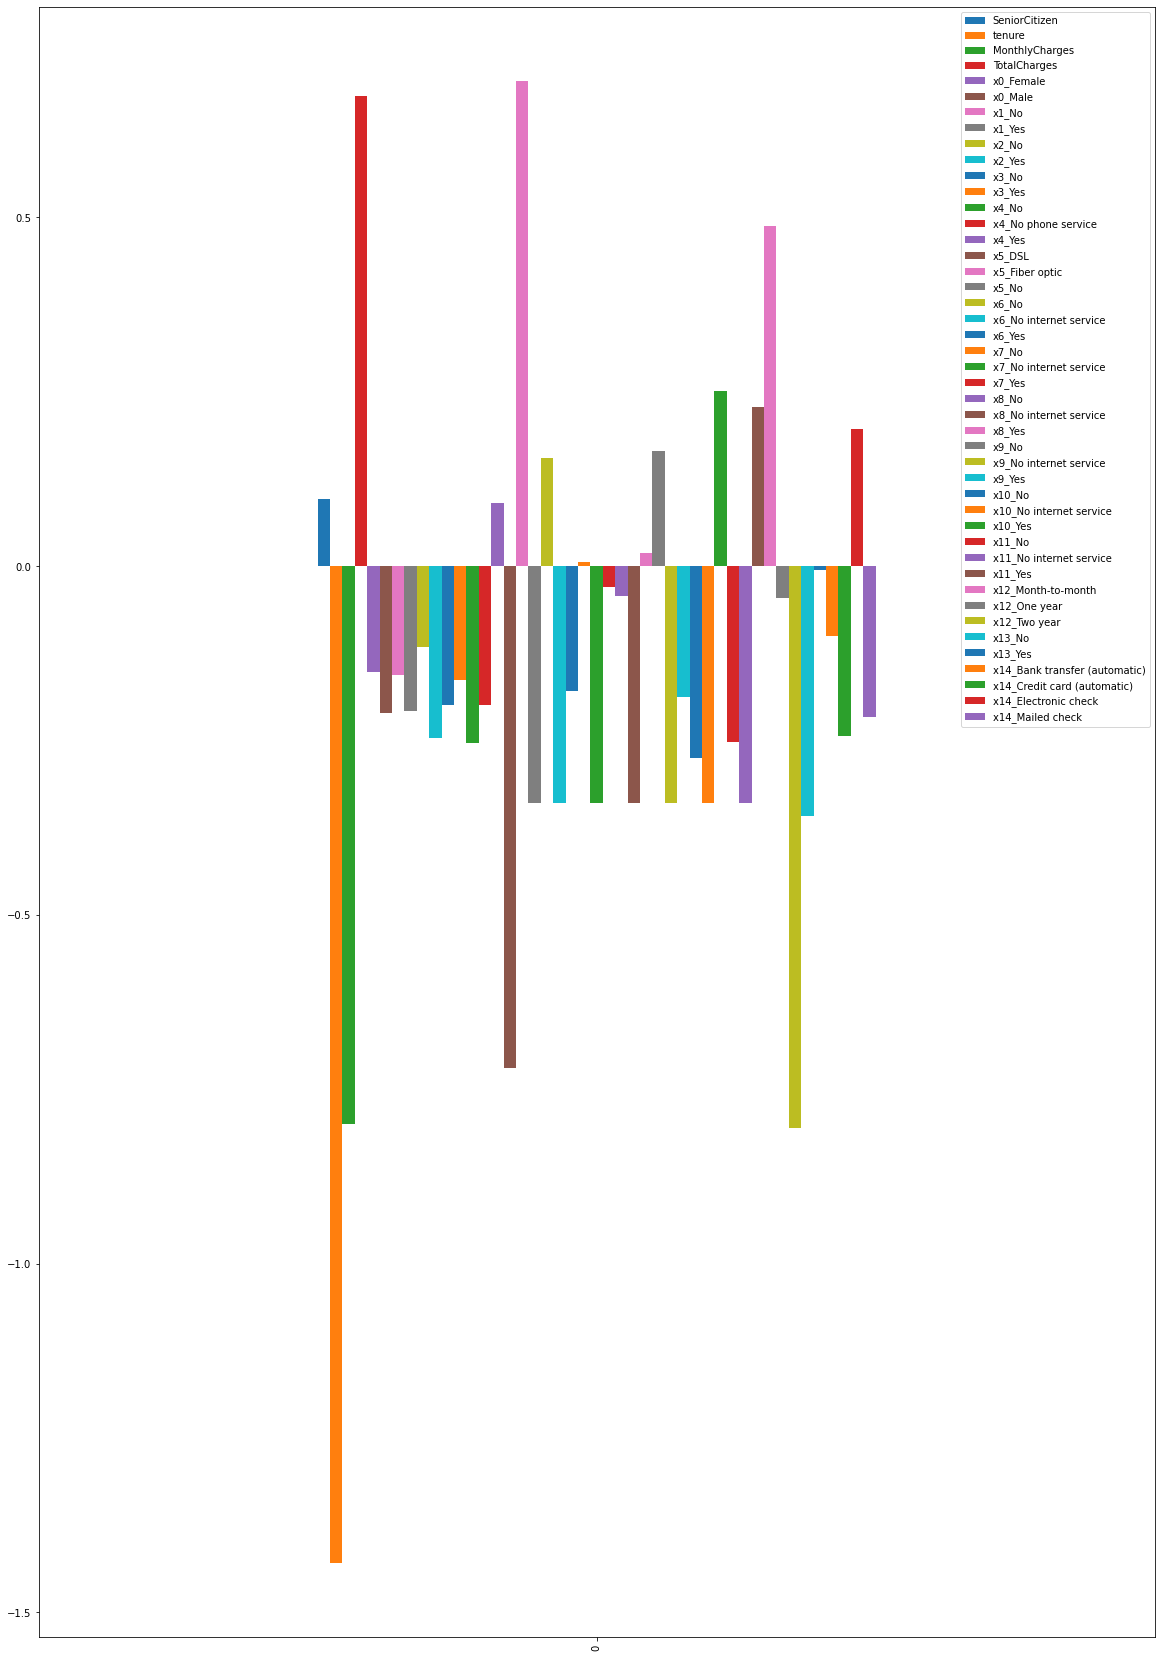

In [47]:
## Let's visualize it
pd.DataFrame(data = coef_array, columns = columns_name).plot.bar(figsize=(20,30))

**Applying the model on the test data**

In [48]:
X_test_transformed = full_pipeline.transform(X_test)

In [49]:
y_pred = lg_clf_best.predict(X_test_transformed)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
acc = accuracy_score(y_test, y_pred)
acc

0.7969283276450512

<AxesSubplot:>

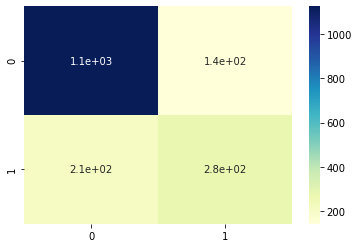

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1267
           1       0.66      0.57      0.61       491

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.79      0.80      0.79      1758

